Autor: **Gabriel Leite Bessa**

Turma: **T1**

Disciplina: **Cálculo Numérico Computacional**

Ordem de execução:

- Importar bibliotecas
- Executar blocos "Criteria", "Plot and printing" e "Exceção"
- Executar blocos dos métodos desejados
- Executar bloco da definição da função e outros parâmetros do método
- Executar bloco da chamada do método

Atenção! As conclusões estão em blocos separados dentro dos blocos de exercícios.



# Algumas pré-definições

In [1]:
import math
import time
import sympy
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate

### 1.2. Functions

In [2]:
x = sympy.Symbol('x')

f1 = x**3 - 9 * x + 5
f1_derivate = f1.diff(x)
f1 = sympy.lambdify(x, f1)
f1_derivate = sympy.lambdify(x, f1_derivate)

f2 = sympy.exp(x) - x - 2
f2_derivate = f2.diff(x)
f2 = sympy.lambdify(x, f2)
f2_derivate = sympy.lambdify(x, f2_derivate)

f3 = x**3 - 6 * x**2 + 11 * x - 6.1
f3_derivate = f3.diff(x)
f3 = sympy.lambdify(x, f3)
f3_derivate = sympy.lambdify(x, f3_derivate)

f4 = x**2 + x - 6
f4_derivate = f4.diff(x)
f4 = sympy.lambdify(x, f4)
f4_derivate = sympy.lambdify(x, f4_derivate)

f5 = x**3 - 9 * x + 3
f5_derivate = f5.diff(x)
f5 = sympy.lambdify(x, f5)
f5_derivate = sympy.lambdify(x, f5_derivate)

f6 = x**3 - 5 * x**2 + 17 * x + 21
f6_derivate = f6.diff(x)
f6 = sympy.lambdify(x, f6)
f6_derivate = sympy.lambdify(x, f6_derivate)

f7 = x**3 - 5 * x**2 + x + 3
f7_derivate = f7.diff(x)
f7 = sympy.lambdify(x, f7)
f7_derivate = sympy.lambdify(x, f7_derivate)

f8 = 2 * x**3 + sympy.log(x) - 5
f8_derivate = f8.diff(x)
f8 = sympy.lambdify(x, f8)
f8_derivate = sympy.lambdify(x, f8_derivate)

f9 = x**3 - 9 * x + 3
f9_derivate = f9.diff(x)
f9_phi = x**3 / 9 + (1 / 3)
f9 = sympy.lambdify(x, f9)
f9_derivate = sympy.lambdify(x, f9_derivate)
f9_phi = sympy.lambdify(x, f9_phi)

### 1.3. Criteria

In [3]:
def convergenceCriteriaChapra(episolon, x0, x1):
    if (abs(x1 - x0) / abs(x0) * 100) < episolon:
        return True
    return False

In [4]:
def convergenceCriteriaRuggiero1(episolon, a, b):
    if (b - a) < episolon:
        return True
    return False

In [5]:
def convergenceCriteriaRuggiero2(episolon, y):
    if abs(y) < episolon:
        return True
    return False

### 1.4. Plot and Printing

In [6]:
def plotGraphic(func, history, a, b, plotAB:bool=False):
  X = np.linspace(a, b, math.trunc((b - a) * 1000))
  Y = func(X)

  fig = plt.figure(figsize=(10,5))
  plt.plot(X, Y, label="Function")
  plt.axhline(y = 0, color="black")
  #plt.axvline(x = 0, color="black")
  plt.scatter(history['x'], [0 for _ in range(len(history['x']))], label="x's values")
  plt.scatter(history['x'][-1], [0], label="x found")
  if plotAB:
    plt.scatter(history['a'][:-1], [0 for _ in range(len(history['a']) - 1)], label="a's values")
    plt.scatter(history['b'][:-1], [0 for _ in range(len(history['b']) - 1)], label="b's values")
  plt.legend()
  plt.grid()
  plt.show()

In [7]:
def plotFunction(func, a, b):
  X = np.linspace(a, b, math.trunc((b - a) * 10))
  Y = func(X)

  fig = plt.figure(figsize=(10,5))
  plt.plot(X, Y, label="Function")
  plt.axhline(y = 0, color="black")
  plt.legend()
  plt.grid()
  plt.show()

In [8]:
def printHistory(history: dict):
  for i in range(len(history['x'])):
    print(f"{i+1} \t x = {history['x'][i]} \t f(x) = {history['y'][i]}", end="")

    if 'a' in history:
      print(f" \t a = {history['a'][i]}", end="")
    if 'b' in history:
      print(f" \t b = {history['b'][i]}", end="")

    print("")

### 1.5. Exceção

In [9]:
class XNotInInterval(Exception):
    def __init__(self, a, b):
        super().__init__(f"x value is not in the interval [{a}, {b}]")

### 1.6. Additional functions

In [10]:
def discoverXInter(func, initialValue:float=0, stepSize:float=1, maxIter:int=5) -> list:
  xInf = initialValue
  xSup = initialValue

  intervals = []

  for _ in range(maxIter):
    if func(xInf) * func(xInf - stepSize) < 0:
      intervals.append((xInf - stepSize, xInf))

    xInf -= stepSize

    if func(xSup) * func(xSup + stepSize) < 0:
      intervals.append((xSup, xSup + stepSize))

    xSup += stepSize

  return intervals

In [11]:
print(discoverXInter(f9))

[(0, 1), (2, 3), (-4, -3)]


In [12]:
def benchmarks(func, funcDer, funcPhi, x0, x1, a, b, episolon=1e-6):
  timer_initial = time.time()
  _, _ = bisectionMethod(func, a, b, episolon)
  timer_bisec = time.time() - timer_initial
  timer_initial = time.time()
  _, _ = falsePositionMethod(func, a, b, episolon)
  timer_result = time.time() - timer_initial

# Métodos

## 2. Método da bisecção

In [13]:
def bisectionMethod(func, a:float, b:float, episolon:float, iterations:int = None) -> tuple[float, dict]:
    history = {'x': [], 'y': [], 'a': [], 'b': []}

    x = (b + a) / 2
    y = func(x)

    if y * func(a) >= 0 and y * func(b) >= 0:
        raise XNotInInterval(a, b)

    history['x'].append(x)
    history['y'].append(y)
    history['a'].append(a)
    history['b'].append(b)

    while not convergenceCriteriaRuggiero2(episolon, y):
        if y * func(a) < 0:
            b = x
        else:
            a = x

        x = (b + a) / 2
        y = func(x)

        history['x'].append(x)
        history['y'].append(y)
        history['a'].append(a)
        history['b'].append(b)



    return x, history


## Teste da bisecção

In [ ]:
try:
    timer_initial = time.time()
    x, history = bisectionMethod(f9, -4, -2, 1e-6)
    timer_result = time.time() - timer_initial
    print(f"Timer result: {math.trunc(timer_result * 10000000) / 100000} milisseconds")
    print(f"Iterations taken: {len(history['x'])}")
    printHistory(history)
except XNotInInterval as xNotIn:
    print(xNotIn)

NameError: ignored

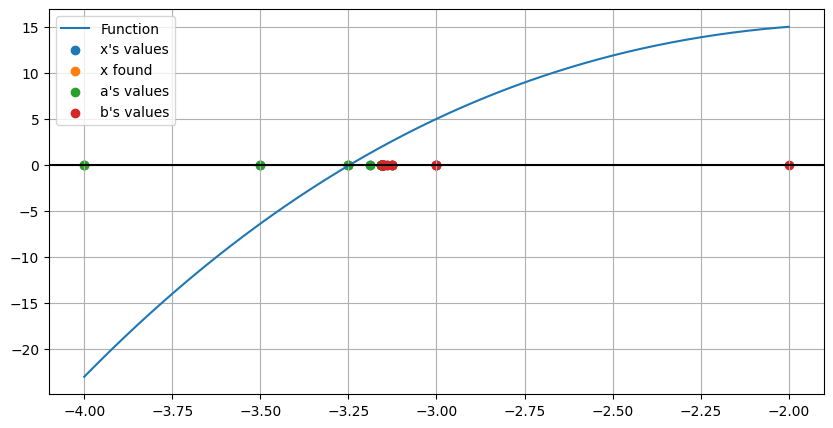

In [ ]:
plotGraphic(f1, history, history['a'][0], history['b'][0], True)

## 3. Método da falsa posição

In [14]:
def falsePositionMethod(func, a:float, b:float, episolon:float, iterations:int = None):
    history = {'x': [], 'y': [], 'a': [], 'b': []}

    x = (a * func(b) - b * func(a)) / (func(b) - func(a))
    y = func(x)

    if y * func(a) >= 0 and y * func(b) >= 0:
        raise XNotInInterval(a, b)

    history['x'].append(x)
    history['y'].append(y)
    history['a'].append(a)
    history['b'].append(b)

    while not convergenceCriteriaRuggiero2(episolon, y):
        if y * func(a) < 0:
            b = x
        else:
            a = x

        x = (a * func(b) - b * func(a)) / (func(b) - func(a))
        y = func(x)

        history['x'].append(x)
        history['y'].append(y)
        history['a'].append(a)
        history['b'].append(b)



    return x, history

## Teste falsa posição

In [ ]:
try:
    timer_initial = time.time()
    x, history = falsePositionMethod(f1, -4, -2, 0.001)
    timer_result = time.time() - timer_initial
    print(f"Timer result: {math.trunc(timer_result * 10000000) / 100000} milisseconds")
    print(f"Iterations taken: {len(history['x'])}")
    printHistory(history)
except XNotInInterval as xNotIn:
    print(xNotIn)

Timer result: 0.0046 milisseconds
Iterations taken: 8
1 	 x = -2.789473684210526 	 f(x) = 8.399912523691505 	 a = -4 	 b = -2
2 	 x = -3.1133062793677913 	 f(x) = 2.843487493409146 	 a = -4 	 b = -2.789473684210526
3 	 x = -3.2108667384871388 	 f(x) = 0.7948395311982637 	 a = -4 	 b = -3.1133062793677913
4 	 x = -3.2372268368946715 	 f(x) = 0.21007747340767935 	 a = -4 	 b = -3.2108667384871388
5 	 x = -3.2441307974295706 	 f(x) = 0.05469687199277473 	 a = -4 	 b = -3.2372268368946715
6 	 x = -3.245924084118432 	 f(x) = 0.014185431646470903 	 a = -4 	 b = -3.2441307974295706
7 	 x = -3.246388879728633 	 f(x) = 0.003675196397590952 	 a = -4 	 b = -3.245924084118432
8 	 x = -3.246509280875439 	 f(x) = 0.0009519277532454851 	 a = -4 	 b = -3.246388879728633


In [ ]:
plotGraphic(f1, history)

TypeError: ignored

## 4. Fixed Point Method

In [ ]:
def fixedPointMethod(func, phiFunc, x0, episolon:float=0.001, iterations:int=None, verbose:bool=False):
  history = {'x': [], 'y': []}

  x = x0
  y = func(x)

  while not convergenceCriteriaRuggiero2(episolon, y):
    x = phiFunc(x)
    y = func(x)

    history['x'].append(x)
    history['y'].append(y)

    if verbose:
      print(f"x = {x} \t f(x) = {y}")

  return x, history

## Teste do ponto fixo

In [ ]:
timer_initial = time.time()
x, history = fixedPointMethod(f9, f9_phi, 0.5, 1e-6)
timer_result = time.time() - timer_initial
print(f"Timer result: {math.trunc(timer_result * 10000000) / 100000} milisseconds")
print(f"Iterations taken: {len(history['x'])}")
printHistory(history)

In [ ]:
plotGraphic(f9, history, -5, 5)

## 5. Newton-Raphson Method

In [ ]:
# Convergence criteria:
# f(x), f'(x) and f''(x) continuas em I
# f'(x) != 0
# x0 is close enough to the real x

def newtonRaphsonMethod(func, firstDerivate, x0, episolon:float=0.001, iterations:int=None, verbose:bool=False) -> tuple[float, dict]:
  history = {'x': [], 'y': []}

  x = x0 - func(x0) / firstDerivate(x0)
  y = func(x)

  history['x'].append(x)
  history['y'].append(y)

  if verbose:
    print(f"x = {x} \t f(x) = {y}")

  while not convergenceCriteriaRuggiero2(episolon, y):
    x = x - func(x) / firstDerivate(x)
    y = func(x)

    history['x'].append(x)
    history['y'].append(y)

    if verbose:
      print(f"x = {x} \t f(x) = {y}")

  return x, history

## Teste do Newton-Raphson

In [ ]:
timer_initial = time.time()
x, history = newtonRaphsonMethod(f9, f9_derivate, 0.5, 1e-6)
timer_result = time.time() - timer_initial
print(f"Timer result: {math.trunc(timer_result * 10000000) / 100000} milisseconds")
print(f"Iterations taken: {len(history['x'])}")
printHistory(history)

In [ ]:
plotGraphic(f9, history, -2, 5)

## 6. Secant Method

In [ ]:
def secantMethod(func, x0:float, x1:float, episolon:float=1e-3, iterations:int=None, verbose:bool=False):
  history = {'x': [], 'y': []}

  x = x1 - (func(x1) * (x1 - x0)) / (func(x1) - func(x0))
  x0 = x1
  x1 = x
  y = func(x)

  history['x'].append(x)
  history['y'].append(y)

  if verbose:
    print(f"x = {x} \t f(x) = {y}")

  while not convergenceCriteriaRuggiero2(episolon, y):
    x = x1 - (func(x1) * (x1 - x0)) / (func(x1) - func(x0))
    x0 = x1
    x1 = x
    y = func(x)

    history['x'].append(x)
    history['y'].append(y)

    if verbose:
      print(f"x = {x} \t f(x) = {y}")

  return x, history

## Teste da secante

In [ ]:
timer_initial = time.time()
x, history = secantMethod(f9, x0 = 2.9, x1 = 2.6, episolon = 1e-6)
timer_result = time.time() - timer_initial
print(f"Timer result: {math.trunc(timer_result * 10000000) / 100000} milisseconds")
print(f"Iterations taken: {len(history['x'])}")
printHistory(history)

In [ ]:
plotGraphic(f9, history, 0.00001, 5)

# Relatório 1

## Exercício 1

In [ ]:
x = sympy.Symbol("x")

f_ex1 = x**3 - 36 * x ** 2 + 188 * x - 240
f_ex1_derivate = f_ex1.diff("x")
f_ex1 = sympy.lambdify(x, f_ex1)
f_ex1_derivate = sympy.lambdify(x, f_ex1_derivate)

f_ex1_raw = lambda x: x**3 - 36 * x ** 2 + 188 * x - 240
f_ex1_derivate_raw = lambda x: 3*x**2-72*x+188

a = 29.5
b = 31
x0 = a
episolon = 1e-4

### Bisecção

In [ ]:
try:
    timer_initial = time.time()
    x, history = bisectionMethod(f_ex1, a, b, episolon)
    timer_result = time.time() - timer_initial
    print(f"Timer result: {math.trunc(timer_result * 10000000) / 100000} milisseconds")
    print(f"Iterations taken: {len(history['x'])}")
    #printHistory(history)
    print(tabulate(history, headers=history.keys(), showindex=range(1, len(history['x'])+1), tablefmt="psql", floatfmt=".5f", numalign="right"))
except XNotInInterval as xNotIn:
    print(xNotIn)

Timer result: 0.01132 milisseconds
Iterations taken: 22
+----+----------+-----------+----------+----------+
|    |        x |         y |        a |        b |
|----+----------+-----------+----------+----------|
|  1 | 30.25000 | 185.39062 | 29.50000 | 31.00000 |
|  2 | 29.87500 | -90.15820 | 29.50000 | 30.25000 |
|  3 | 30.06250 |  45.71118 | 29.87500 | 30.25000 |
|  4 | 29.96875 | -22.69730 | 29.87500 | 30.06250 |
|  5 | 30.01562 |  11.38819 | 29.96875 | 30.06250 |
|  6 | 29.99219 |  -5.68420 | 29.96875 | 30.01562 |
|  7 | 30.00391 |   2.84457 | 29.99219 | 30.01562 |
|  8 | 29.99805 |  -1.42167 | 29.99219 | 30.00391 |
|  9 | 30.00098 |   0.71099 | 29.99805 | 30.00391 |
| 10 | 29.99951 |  -0.35546 | 29.99805 | 30.00098 |
| 11 | 30.00024 |   0.17774 | 29.99951 | 30.00098 |
| 12 | 29.99988 |  -0.08887 | 29.99951 | 30.00024 |
| 13 | 30.00006 |   0.04443 | 29.99988 | 30.00024 |
| 14 | 29.99997 |  -0.02222 | 29.99988 | 30.00006 |
| 15 | 30.00002 |   0.01111 | 29.99997 | 30.00006 |
| 16 | 2

Timer result: 0.00553 milisseconds
Iterations taken: 22
+----+----------+-----------+----------+----------+
|    |        x |         y |        a |        b |
|----+----------+-----------+----------+----------|
|  1 | 30.25000 | 185.39062 | 29.50000 | 31.00000 |
|  2 | 29.87500 | -90.15820 | 29.50000 | 30.25000 |
|  3 | 30.06250 |  45.71118 | 29.87500 | 30.25000 |
|  4 | 29.96875 | -22.69730 | 29.87500 | 30.06250 |
|  5 | 30.01562 |  11.38819 | 29.96875 | 30.06250 |
|  6 | 29.99219 |  -5.68420 | 29.96875 | 30.01562 |
|  7 | 30.00391 |   2.84457 | 29.99219 | 30.01562 |
|  8 | 29.99805 |  -1.42167 | 29.99219 | 30.00391 |
|  9 | 30.00098 |   0.71099 | 29.99805 | 30.00391 |
| 10 | 29.99951 |  -0.35546 | 29.99805 | 30.00098 |
| 11 | 30.00024 |   0.17774 | 29.99951 | 30.00098 |
| 12 | 29.99988 |  -0.08887 | 29.99951 | 30.00024 |
| 13 | 30.00006 |   0.04443 | 29.99988 | 30.00024 |
| 14 | 29.99997 |  -0.02222 | 29.99988 | 30.00006 |
| 15 | 30.00002 |   0.01111 | 29.99997 | 30.00006 |
| 16 | 2

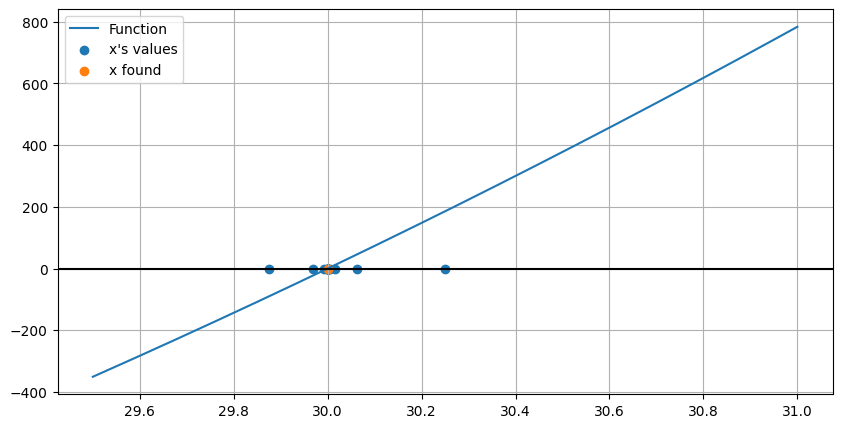

In [ ]:
try:
    timer_initial = time.time()
    x, history = bisectionMethod(f_ex1_raw, a, b, episolon)
    timer_result = time.time() - timer_initial
    print(f"Timer result: {math.trunc(timer_result * 10000000) / 100000} milisseconds")
    print(f"Iterations taken: {len(history['x'])}")
    #printHistory(history)
    print(tabulate(history, headers=history.keys(), showindex=range(1, len(history['x'])+1), tablefmt="psql", floatfmt=".5f", numalign="right"))
    plotGraphic(f_ex1, history, a, b)
except XNotInInterval as xNotIn:
    print(xNotIn)

### Newton-Raphson

In [ ]:
timer_initial = time.time()
x, history = newtonRaphsonMethod(f_ex1, f_ex1_derivate, x0, episolon)
timer_result = time.time() - timer_initial
print(f"Timer result: {math.trunc(timer_result * 10000000) / 100000} milisseconds")
print(f"Iterations taken: {len(history['x'])}")
print(tabulate(history, headers=history.keys(), showindex=range(1, len(history['x'])+1), tablefmt="psql", floatfmt=".5f", numalign="right"))

Timer result: 0.01585 milisseconds
Iterations taken: 3
+----+----------+----------+
|    |        x |        y |
|----+----------+----------|
|  1 | 30.01964 | 14.31650 |
|  2 | 30.00003 |  0.02078 |
|  3 | 30.00000 |  0.00000 |
+----+----------+----------+


Timer result: 0.01778 milisseconds
Iterations taken: 3
+----+----------+----------+
|    |        x |        y |
|----+----------+----------|
|  1 | 30.01964 | 14.31650 |
|  2 | 30.00003 |  0.02078 |
|  3 | 30.00000 |  0.00000 |
+----+----------+----------+


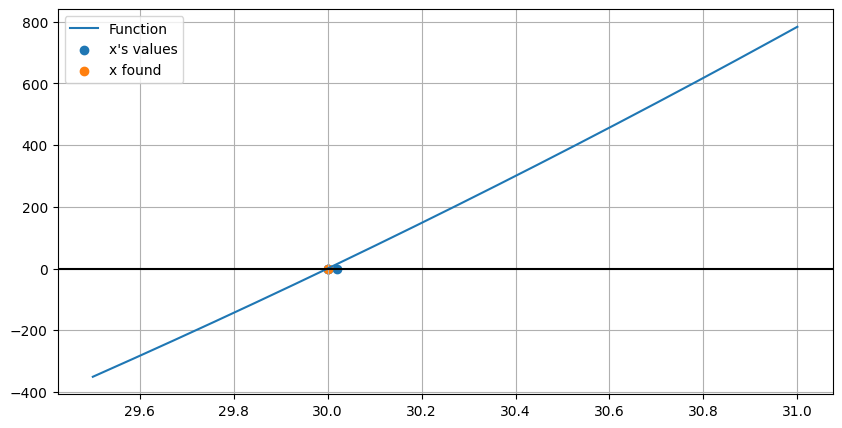

In [ ]:
# TESTE UTILIZANDO FUNÇÕES LAMBDA E NÃO A LIB SYMPY
timer_initial = time.time()
x, history = newtonRaphsonMethod(f_ex1_raw, f_ex1_derivate_raw, x0, episolon)
timer_result = time.time() - timer_initial
print(f"Timer result: {math.trunc(timer_result * 10000000) / 100000} milisseconds")
print(f"Iterations taken: {len(history['x'])}")
print(tabulate(history, headers=history.keys(), showindex=range(1, len(history['x'])+1), tablefmt="psql", floatfmt=".5f", numalign="right"))
plotGraphic(f_ex1, history, a, b)

### Conclusões

Nos experimentos acima para o exercício 1 foi possível verificar que para a função de entrada e os intervalos definidos o método da bisecção performou melhor em questão de tempo, obtendo o resultado em 0,00681 ms enquanto o método de Newton-Raphson obteve o resultado em 0,0159 ms, tal diferença ainda se manteve mesmo utilizando funções lambda ao invés da biblioteca sympy, entretanto, devido a baixa complexidade da equação talvez este resultado não seja conclusivo.

Outra métrica que pode ser avaliada é o número de iterações que cada método levou para conseguir seus resultados, tendo então o método de Newton-Raphson performado melhor obtendo o resultado em 3 iterações enquanto o da bisecção levou 22 iterações.

## Exercício 2

Aplique o método da Falsa Posição para calcular a raiz de x ** 2 - 5= 0 com tol = 0.01.

a) partindo do intervalo inicial [2,2.5];

b) partindo do intervalo inicial [2,3].

Podemos afirmar que a raiz exata x = x’ ± tol ? Justifique

In [ ]:
f_ex2 = lambda x: x**2-5

episolon = 1e-2

### Exp 1

Timer result: 0.0025 milisseconds
Iterations taken: 2
+----+---------+----------+---------+---------+
|    |       x |        y |       a |       b |
|----+---------+----------+---------+---------|
|  1 | 2.22222 | -0.06173 | 2.00000 | 2.50000 |
|  2 | 2.23529 | -0.00346 | 2.22222 | 2.50000 |
+----+---------+----------+---------+---------+


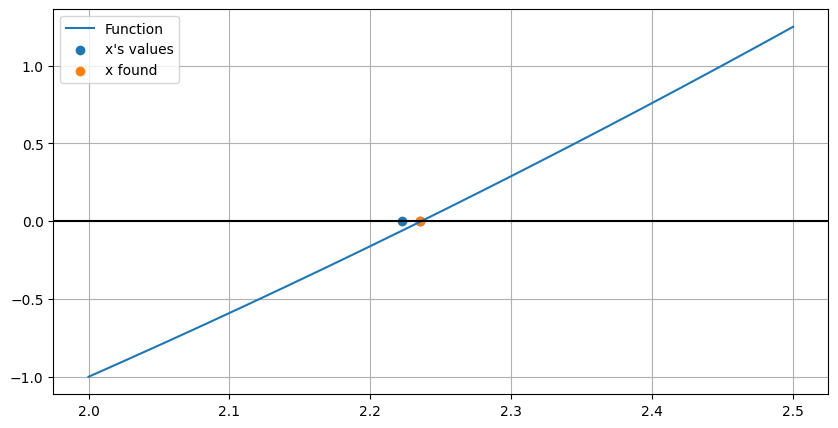

In [ ]:
a = 2
b = 2.5

try:
    timer_initial = time.time()
    x, history = falsePositionMethod(f_ex2, a, b, episolon)
    timer_result = time.time() - timer_initial
    print(f"Timer result: {math.trunc(timer_result * 10000000) / 100000} milisseconds")
    print(f"Iterations taken: {len(history['x'])}")
    print(tabulate(history, headers=history.keys(), showindex=range(1, len(history['x'])+1), tablefmt="psql", floatfmt=".5f", numalign="right"))
    plotGraphic(f_ex2, history, a, b)
except XNotInInterval as xNotIn:
    print(xNotIn)

### Exp 2

Timer result: 0.00269 milisseconds
Iterations taken: 3
+----+---------+----------+---------+-----+
|    |       x |        y |       a |   b |
|----+---------+----------+---------+-----|
|  1 | 2.20000 | -0.16000 | 2.00000 |   3 |
|  2 | 2.23077 | -0.02367 | 2.20000 |   3 |
|  3 | 2.23529 | -0.00346 | 2.23077 |   3 |
+----+---------+----------+---------+-----+


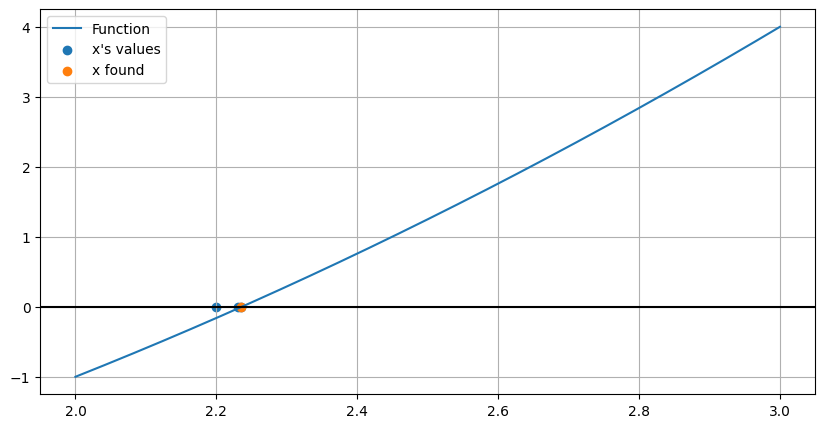

In [ ]:
a = 2
b = 3

try:
    timer_initial = time.time()
    x, history = falsePositionMethod(f_ex2, a, b, episolon)
    timer_result = time.time() - timer_initial
    print(f"Timer result: {math.trunc(timer_result * 10000000) / 100000} milisseconds")
    print(f"Iterations taken: {len(history['x'])}")
    print(tabulate(history, headers=history.keys(), showindex=range(1, len(history['x'])+1), tablefmt="psql", floatfmt=".5f", numalign="right"))
    plotGraphic(f_ex2, history, a, b)
except XNotInInterval as xNotIn:
    print(xNotIn)

### Conclusões

Com os experimentos foi possível perceber que aumentar o intervalo em 0,5 causou a demora de uma iteração a mais para chegar-se no resultado com a tolerância desejada.

Quanto a última questão: não é possível afirmar que x = x' +- tol, já que a tolerância diz respeito ao quão próximo de 0 o valor está no eixo y, não tendo relação direta com o eixo x da função.

## Exercício 3

Considere a equação e1/x − x = 0.

a) Mostre graficamente que a equação anterior tem uma única raiz no intervalo [1,2].

b) Considere a aproximação inicial x0 = 1. Verifique o método de Newton-Raphson converge.

In [ ]:
x = sympy.Symbol("x")

f = sympy.exp((1 / x)) - x
f_derivate = f.diff("x")
f = sympy.lambdify(x, f)
f_derivate = sympy.lambdify(x, f_derivate)

f_raw = lambda x: math.exp((1 / x)) - x
f_derivate_raw = lambda x: math.log(x) * math.exp((1 / x)) - 1

a = 1
b = 2
x0 = a
episolon = 1e-4

### Exp 1

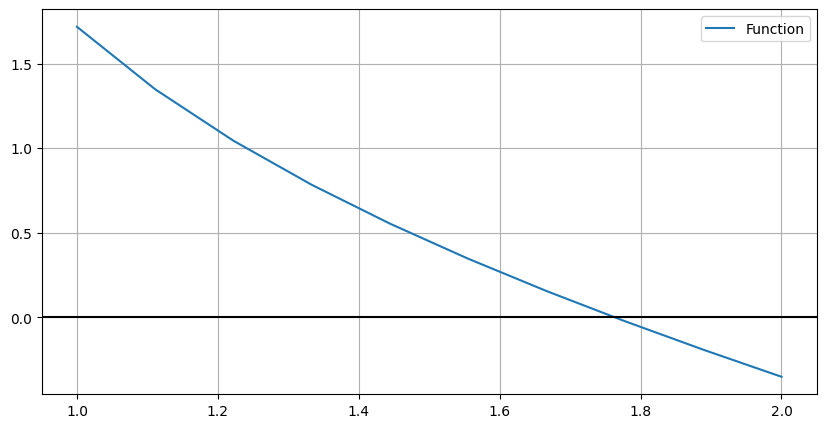

In [ ]:
plotFunction(f, a, b)

### Exp 2

Timer result: 0.02028 milisseconds
Iterations taken: 4
+----+---------+---------+
|    |       x |       y |
|----+---------+---------|
|  1 | 1.46212 | 0.51955 |
|  2 | 1.73174 | 0.04976 |
|  3 | 1.76295 | 0.00042 |
|  4 | 1.76322 | 0.00000 |
+----+---------+---------+


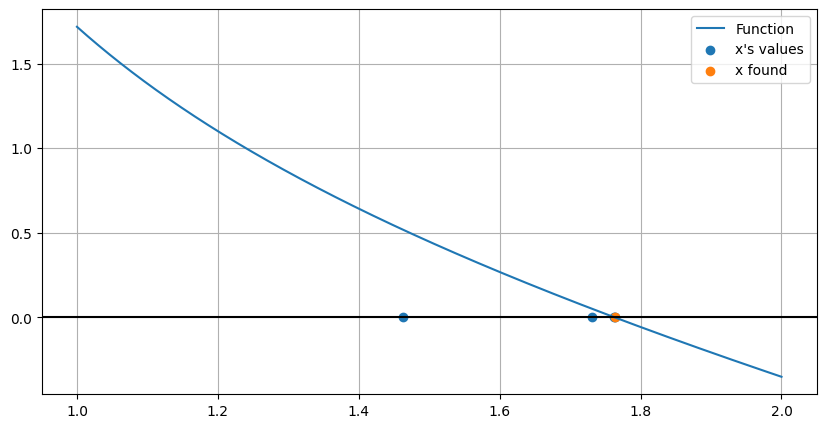

In [ ]:
timer_initial = time.time()
x, history = newtonRaphsonMethod(f, f_derivate, x0, episolon)
timer_result = time.time() - timer_initial
print(f"Timer result: {math.trunc(timer_result * 10000000) / 100000} milisseconds")
print(f"Iterations taken: {len(history['x'])}")
print(tabulate(history, headers=history.keys(), showindex=range(1, len(history['x'])+1), tablefmt="psql", floatfmt=".5f", numalign="right"))
plotGraphic(f, history, a, b)

### Conclusões

Como apresentado acima, o método da tangente para essa função nos pontos testados converge.

## Exercício 4

A recolha de energia solar através da focagem de um campo plano de espelhos numa central de recolha foi estudada por Vant-Hull (1976). A equação para a concentração geométrica do fator C é dada por:

𝐶 = ( ( &#x3c0; * ( ℎ/cos (𝐴) ) ** 2 ) *  𝐹 ) / ( 0.5 * &#x3c0; * 𝐷 ** 2 * ( 1 + sin(𝐴) − 0.5 cos(𝐴)) )

em que A é o ângulo do campo, F é a cobertura da fração do campo com espelhos, D é o diâmetro do coletor e h é o comprimento do coletor.Considerando h =  300, F = 0.8 e D = 14, calcule o ângulo positivo A inferior a &#x3C0;/25 para o qual a concentração do fator C é 1200. Utilize o método iterativo mais adequado e considere no critério de paragem ε1 = ε2 = 1e−3 ou no máximo 3 iterações.

In [ ]:
A = sympy.Symbol("A")

f = (((sympy.pi * (300/sympy.cos(A))**2) * 0.8)/(0.5*sympy.pi*(14**2)*(1+sympy.sin(A)-0.5*sympy.cos(A)))) - 1200
f_der = f.diff(A)
print(f_der)
f = sympy.lambdify(A, f)
f_der = sympy.lambdify(A, f_der)

a = 0
b = math.pi/25
x0 = math.pi/50
episolon = 1e-3

734.69387755102*(-0.5*sin(A) - cos(A))/((sin(A) - 0.5*cos(A) + 1)**2*cos(A)**2) + 1469.38775510204*sin(A)/((sin(A) - 0.5*cos(A) + 1)*cos(A)**3)


Timer result: 0.04293 milisseconds
Iterations taken: 17
+----+---------+-----------+---------+---------+
|    |       x |         y |       a |       b |
|----+---------+-----------+---------+---------|
|  1 | 0.06283 | 108.32187 | 0.00000 | 0.12566 |
|  2 | 0.09425 |  43.04003 | 0.06283 | 0.12566 |
|  3 | 0.10996 |  13.61723 | 0.09425 | 0.12566 |
|  4 | 0.11781 |  -0.35091 | 0.10996 | 0.12566 |
|  5 | 0.11388 |   6.57290 | 0.10996 | 0.11781 |
|  6 | 0.11585 |   3.09606 | 0.11388 | 0.11781 |
|  7 | 0.11683 |   1.36885 | 0.11585 | 0.11781 |
|  8 | 0.11732 |   0.50804 | 0.11683 | 0.11781 |
|  9 | 0.11756 |   0.07834 | 0.11732 | 0.11781 |
| 10 | 0.11769 |  -0.13634 | 0.11756 | 0.11781 |
| 11 | 0.11763 |  -0.02902 | 0.11756 | 0.11769 |
| 12 | 0.11759 |   0.02465 | 0.11756 | 0.11763 |
| 13 | 0.11761 |  -0.00218 | 0.11759 | 0.11763 |
| 14 | 0.11760 |   0.01124 | 0.11759 | 0.11761 |
| 15 | 0.11761 |   0.00453 | 0.11760 | 0.11761 |
| 16 | 0.11761 |   0.00117 | 0.11761 | 0.11761 |
| 17 | 0.1176

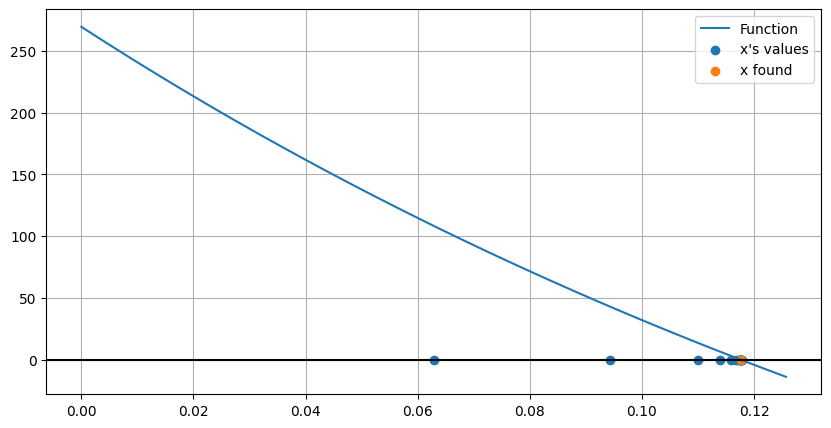

In [ ]:
try:
    timer_initial = time.time()
    x, history = bisectionMethod(f, a, b, episolon)
    timer_result = time.time() - timer_initial
    print(f"Timer result: {math.trunc(timer_result * 10000000) / 100000} milisseconds")
    print(f"Iterations taken: {len(history['x'])}")
    print(tabulate(history, headers=history.keys(), showindex=range(1, len(history['x'])+1), tablefmt="psql", floatfmt=".5f", numalign="right"))
    plotGraphic(f, history, a, b)
except XNotInInterval as xNotIn:
    print(xNotIn)

Timer result: 0.04253 milisseconds
Iterations taken: 7
+----+---------+----------+-----+---------+
|    |       x |        y |   a |       b |
|----+---------+----------+-----+---------|
|  1 | 0.11952 | -3.33116 |   0 | 0.12566 |
|  2 | 0.11806 | -0.79030 |   0 | 0.11952 |
|  3 | 0.11772 | -0.18687 |   0 | 0.11806 |
|  4 | 0.11763 | -0.04415 |   0 | 0.11772 |
|  5 | 0.11762 | -0.01043 |   0 | 0.11763 |
|  6 | 0.11761 | -0.00246 |   0 | 0.11762 |
|  7 | 0.11761 | -0.00058 |   0 | 0.11761 |
+----+---------+----------+-----+---------+


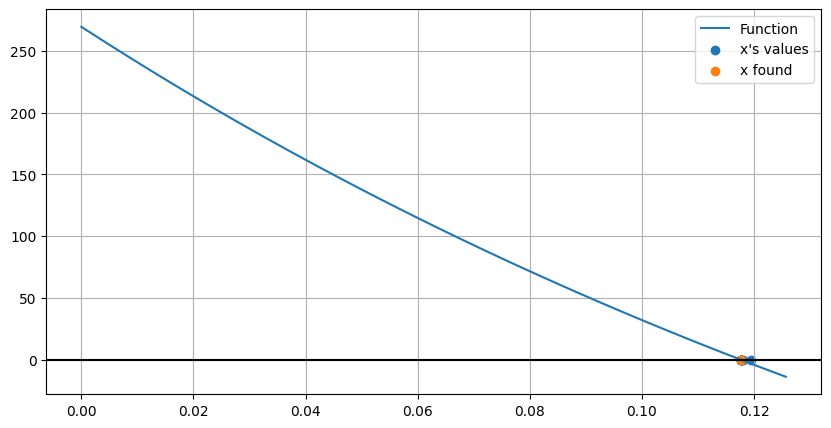

In [ ]:
try:
    timer_initial = time.time()
    x, history = falsePositionMethod(f, a, b, 0.001)
    timer_result = time.time() - timer_initial
    print(f"Timer result: {math.trunc(timer_result * 10000000) / 100000} milisseconds")
    print(f"Iterations taken: {len(history['x'])}")
    print(tabulate(history, headers=history.keys(), showindex=range(1, len(history['x'])+1), tablefmt="psql", floatfmt=".5f", numalign="right"))
    plotGraphic(f, history, a, b)
except XNotInInterval as xNotIn:
    print(xNotIn)
except ZeroDivisionError as zeroDiv:
    print(f"Divisão por zero encontrada!\nDetalhes: {zeroDiv}", )

Timer result: 0.03635 milisseconds
Iterations taken: 3
+----+---------+----------+
|    |       x |        y |
|----+---------+----------|
|  1 | 0.11153 | 10.77617 |
|  2 | 0.11753 |  0.14074 |
|  3 | 0.11761 |  0.00002 |
+----+---------+----------+


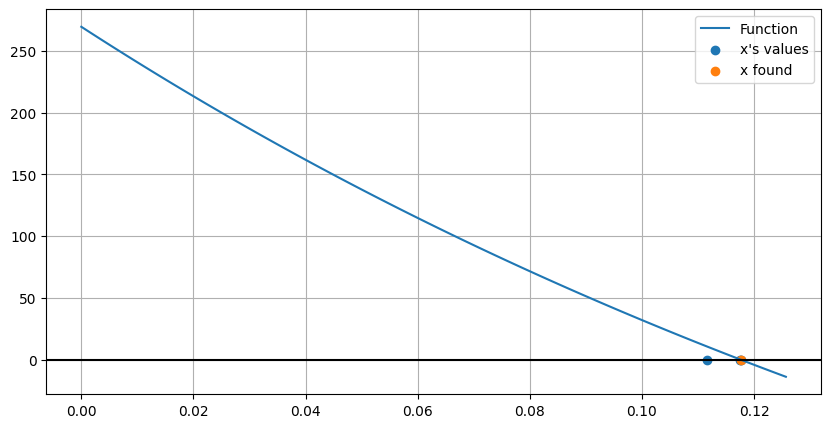

In [ ]:
timer_initial = time.time()
x, history = newtonRaphsonMethod(f, f_der, x0, episolon)
timer_result = time.time() - timer_initial
print(f"Timer result: {math.trunc(timer_result * 10000000) / 100000} milisseconds")
print(f"Iterations taken: {len(history['x'])}")
print(tabulate(history, headers=history.keys(), showindex=range(1, len(history['x'])+1), tablefmt="psql", floatfmt=".5f", numalign="right"))
plotGraphic(f, history, a, b)

Timer result: 0.03981 milisseconds
Iterations taken: 4
+----+---------+----------+
|    |       x |        y |
|----+---------+----------|
|  1 | 0.11160 | 10.65554 |
|  2 | 0.11693 |  1.19566 |
|  3 | 0.11760 |  0.01570 |
|  4 | 0.11761 |  0.00002 |
+----+---------+----------+


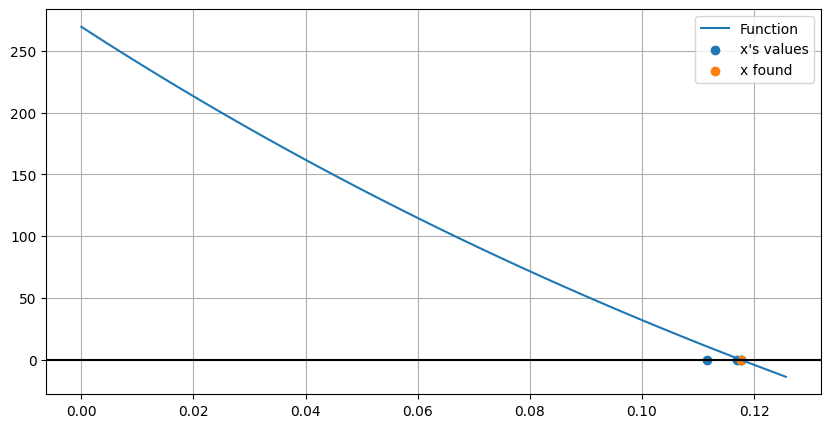

In [ ]:
timer_initial = time.time()
x, history = secantMethod(f, x0, x0*1.01, episolon)
timer_result = time.time() - timer_initial
print(f"Timer result: {math.trunc(timer_result * 10000000) / 100000} milisseconds")
print(f"Iterations taken: {len(history['x'])}")
print(tabulate(history, headers=history.keys(), showindex=range(1, len(history['x'])+1), tablefmt="psql", floatfmt=".5f", numalign="right"))
plotGraphic(f, history, a, b)

### Conclusões

Nos experimentos realizados para esse exercício o método mais que chegou ao resultado mais rapidamente foi o da tangente, isso mesmo ele possuindo uma complexidade de resolução maior devido a execução de duas funções.



## Exercício 5

Um certo equipamento de 20000 reais vai ser pago durante 6 anos. O pagamento
anual é de 4000 reais. A relação entre o custo do equipamento P, o pagamento
anual A, o número de anos n e a taxa de juro i é a seguinte:
𝐴 = 𝑃 &times; ( 𝑖 &times; ( 1 + i )<sup>n</sup> ) &divide; (( 1 + i )<sup>n</sup> − 1 )

Utilize os métodos da Bissecção, Falsa Posição, Newton-Raphson e Secante para
determinar a taxa de juro utilizada nos cálculos. O valor da taxa de juro pertence
ao intervalo [0.05, 0.15]. Para a paragem do processo iterativo use ε1 = ε2 = 0.05
ou no máximo 3 iterações. Compare e explique os resultados obtidos por cada
método (por exemplo: rapidez da convergência e esforço computacional)

In [16]:
i = sympy.Symbol("i")


f = (20_000 * ( i * (1 + i) ** 6 ) / ((1 + i) ** 6 - 1)) - 4_000
f_der = f.diff(i)
print(f_der)
f = sympy.lambdify(i, f)
f_der = sympy.lambdify(i, f_der)

a = 0.05
b = 0.15
x0 = (a + b) / 2
episolon = 5e-2

-120000*i*(i + 1)**11/((i + 1)**6 - 1)**2 + 120000*i*(i + 1)**5/((i + 1)**6 - 1) + 20000*(i + 1)**6/((i + 1)**6 - 1)


#### Bisecção

Timer result: 0.00431 milisseconds
Iterations taken: 14
+----+---------+-----------+---------+---------+
|    |       x |         y |       a |       b |
|----+---------+-----------+---------+---------|
|  1 | 0.10000 | 592.14761 | 0.05000 | 0.15000 |
|  2 | 0.07500 | 260.89782 | 0.05000 | 0.10000 |
|  3 | 0.06250 |  99.25465 | 0.05000 | 0.07500 |
|  4 | 0.05625 |  19.45588 | 0.05000 | 0.06250 |
|  5 | 0.05313 | -20.18439 | 0.05000 | 0.05625 |
|  6 | 0.05469 |  -0.38595 | 0.05313 | 0.05625 |
|  7 | 0.05547 |   9.52955 | 0.05469 | 0.05625 |
|  8 | 0.05508 |   4.57045 | 0.05469 | 0.05547 |
|  9 | 0.05488 |   2.09191 | 0.05469 | 0.05508 |
| 10 | 0.05479 |   0.85290 | 0.05469 | 0.05488 |
| 11 | 0.05474 |   0.23345 | 0.05469 | 0.05479 |
| 12 | 0.05471 |  -0.07625 | 0.05469 | 0.05474 |
| 13 | 0.05472 |   0.07860 | 0.05471 | 0.05474 |
| 14 | 0.05472 |   0.00117 | 0.05471 | 0.05472 |
+----+---------+-----------+---------+---------+


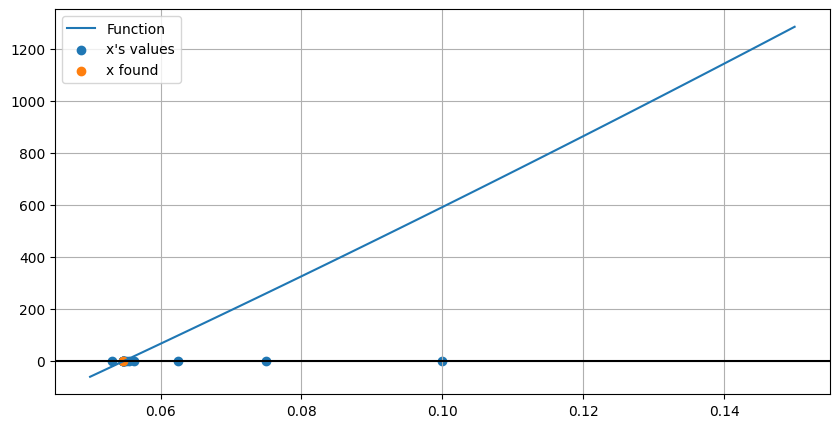

In [ ]:
try:
    timer_initial = time.time()
    x, history = bisectionMethod(f, a, b, episolon)
    timer_result = time.time() - timer_initial
    print(f"Timer result: {math.trunc(timer_result * 10000000) / 100000} milisseconds")
    print(f"Iterations taken: {len(history['x'])}")
    print(tabulate(history, headers=history.keys(), showindex=range(1, len(history['x'])+1), tablefmt="psql", floatfmt=".5f", numalign="right"))
    plotGraphic(f, history, a, b)
except XNotInInterval as xNotIn:
    print(xNotIn)

#### Falsa posição

Timer result: 0.005 milisseconds
Iterations taken: 4
+----+---------+----------+---------+---------+
|    |       x |        y |       a |       b |
|----+---------+----------+---------+---------|
|  1 | 0.05444 | -3.56285 | 0.05000 | 0.15000 |
|  2 | 0.05470 | -0.21100 | 0.05444 | 0.15000 |
|  3 | 0.05472 | -0.01249 | 0.05470 | 0.15000 |
|  4 | 0.05472 | -0.00074 | 0.05472 | 0.15000 |
+----+---------+----------+---------+---------+


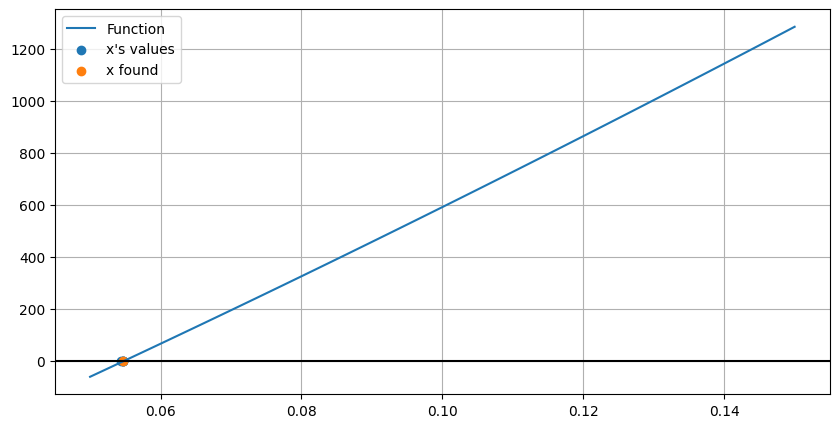

In [17]:
try:
    timer_initial = time.time()
    x, history = falsePositionMethod(f, a, b, 0.001)
    timer_result = time.time() - timer_initial
    print(f"Timer result: {math.trunc(timer_result * 10000000) / 100000} milisseconds")
    print(f"Iterations taken: {len(history['x'])}")
    print(tabulate(history, headers=history.keys(), showindex=range(1, len(history['x'])+1), tablefmt="psql", floatfmt=".5f", numalign="right"))
    plotGraphic(f, history, a, b)
except XNotInInterval as xNotIn:
    print(xNotIn)
except ZeroDivisionError as zeroDiv:
    print(f"Divisão por zero encontrada!\nDetalhes: {zeroDiv}", )

#### Newton-Raphson

Timer result: 0.01535 milisseconds
Iterations taken: 2
+----+---------+----------+
|    |       x |        y |
|----+---------+----------|
|  1 | 0.05600 | 16.25411 |
|  2 | 0.05472 |  0.01451 |
+----+---------+----------+


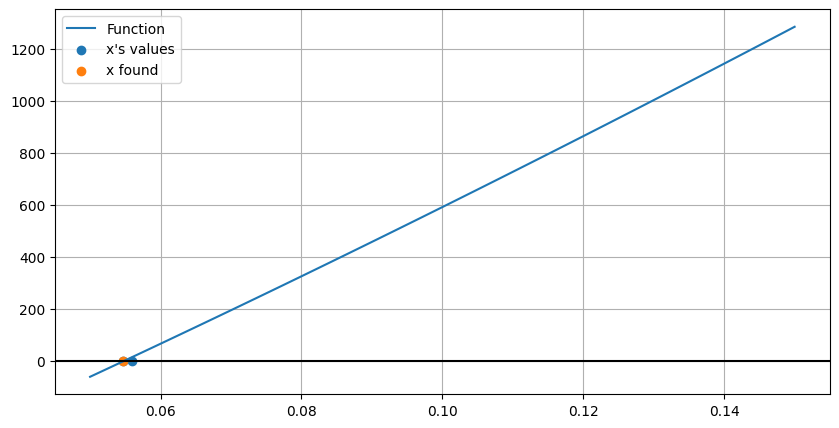

In [ ]:
timer_initial = time.time()
x, history = newtonRaphsonMethod(f, f_der, x0, episolon)
timer_result = time.time() - timer_initial
print(f"Timer result: {math.trunc(timer_result * 10000000) / 100000} milisseconds")
print(f"Iterations taken: {len(history['x'])}")
print(tabulate(history, headers=history.keys(), showindex=range(1, len(history['x'])+1), tablefmt="psql", floatfmt=".5f", numalign="right"))
plotGraphic(f, history, a, b)

#### Secante

Timer result: 0.0143 milisseconds
Iterations taken: 3
+----+---------+----------+
|    |       x |        y |
|----+---------+----------|
|  1 | 0.05602 | 16.59270 |
|  2 | 0.05476 |  0.50570 |
|  3 | 0.05472 |  0.00046 |
+----+---------+----------+


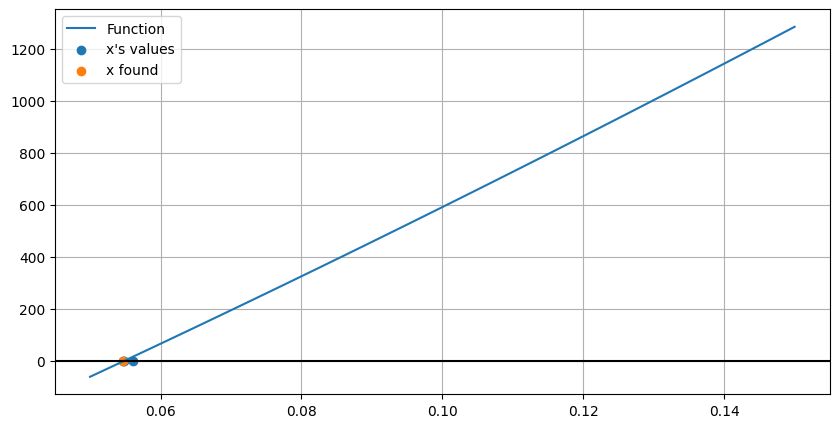

In [ ]:
timer_initial = time.time()
x, history = secantMethod(f, x0, x0*1.01, episolon)
timer_result = time.time() - timer_initial
print(f"Timer result: {math.trunc(timer_result * 10000000) / 100000} milisseconds")
print(f"Iterations taken: {len(history['x'])}")
print(tabulate(history, headers=history.keys(), showindex=range(1, len(history['x'])+1), tablefmt="psql", floatfmt=".5f", numalign="right"))
plotGraphic(f, history, a, b)

#### Conclusão

Assim, com os resultados obtidos no exercício 5, podemos inferir que o método que obteve o melhor desempenho no quisito velocidade de obtenção do resultado foi o método da falsa posição que em 0,00324 ms retornou o valor de x, levando 4 iterações. O método da bisecção também obteve o resultado rapidamente, entretanto devido a melhor otimização do método da falsa posição, ela performa melhor. Já os métodos da tangente e da secante foram mais lentos devido a complexidade maior envolvida na sua resolução, mas encontraram o resultado em menos iterações que os anteriores. Por fim, mesmo tendo menos iterações, o método da falsa posição ainda é melhor já que conseguiu somente 4 iterações no tempo citado acima.